## Priprava podatkov, osnovne statistike in vizualizacija

Podatkovno rudarjenje, naloga, `<23.3.2025>`
**`<Nik Šurina>`**

Neizogiben del vsakega projekta na področju podatkovnega rudarjenja je iskanje,
urejanje in priprava podatkov. V tej nalogi boste spoznali primer podatkovne
zbirke in uporabili postopke za pretvorbo podatkov v ustrezno obliko ter pregled in
prikaz osnovnih statistik.

### Podatki

V nalogi boste pregledali in pripravili podatke gledanosti Hollywoodskih filmov
zbirke [MovieLens](https://grouplens.org/datasets/movielens/) v obdobju **1995-2016**.

Iste podatke boste uporabili v vseh nalogah, zato jih dodobra spoznajte. Gre za podatkovno zbirko za
vrednotenje priporočilnih sistemov, ki vsebuje gledalce ter njihove ocene za posamezni film na lestvici 1 do 5. 
Poleg osnovne matrike uporabnikov in ocen vsebuje še dodatne podatke o filmih (npr. žanr, datum, oznake,
igralci).

Podatki so v mapi `./podatki/ml-latest-small`. Podatkovna zbirka vsebuje naslednje datoteke:

* ratings.csv: podatki o uporabnikih in ocenah,
* movies.csv: podatki o žanrih filmov,
* cast.csv: podatki o igralcih,
* tags.csv: podatki o oznakah (ang. \emph{tags}),
* links.csv: povezave na sorodne podatkovne zbirke.


Pred pričetkom reševanja naloge si dobro oglejte podatke in datoteko **README.txt**. Podrobnosti o zbirki lahko preberete na [spletni strani](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

Pripravite metode za nalaganje podatkov v ustrezne podatkovne strukture. Te vam bodo prišle
prav tudi pri nadaljnjih nalogah.
Bodite pozorni na velikost podatkov.

Zapišite kodo za branje datotek in pripravo ustreznih matrik (in drugih struktur) podatkov, ki jih boste uporabi pri odgovarjanju na spodnja vprašanja.

Kodo lahko razdelite v več celic.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

cast = pd. read_csv( 'podatki/ml-latest-small/cast.csv')
ratings = pd. read_csv ('podatki/ml-latest-small/ratings.csv')
movies = pd. read_csv('podatki/ml-latest-small/movies.csv')
links = pd.read_csv ('podatki/ml-latest-small/links.csv')
tags = pd. read_csv('podatki/ml-latest-small/tags.csv')



### Vprašanja

Glavni namen podatkovnega rudarjenja je *odkrivanje znanj iz podatkov*,
torej odgovarjanje na vprašanja z uporabo računskih postopkov.

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne implementacija vaše rešitve.

#### 1. vprašanje (15%):
Kateri filmi so v povprečju najbolje ocenjeni?  Pripravite seznam
filmov ter njihovih povprečnih ocen in izpišite 10 filmov z vrha seznama.
Opazite pri takem ocenjevanju kakšno težavo? Kako bi jo lahko rešili? Kakšni so
rezultati tedaj?

Kodo lahko razdelite v več celic.

In [3]:
movie_stats = ratings.groupby('movieId').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['avg_rating', 'rating_count']
movie_stats = movie_stats.reset_index()

movies_with_stats = pd.merge(movies, movie_stats, on='movieId', how='left')
min_ratings = 100
popular_movies = movies_with_stats[movies_with_stats['rating_count'] >= min_ratings]

# Prikaz top 10 filmov po povprečni oceni med filmi, ki imajo dovolj ocen
top10_popular = popular_movies.sort_values(by='avg_rating', ascending=False).head(10)
print("Top 10 filmov po povprečni oceni (s filtrom: vsaj 100 ocen):")
display(top10_popular[['title', 'avg_rating', 'rating_count']])

Top 10 filmov po povprečni oceni (s filtrom: vsaj 100 ocen):


,title,avg_rating,rating_count
695,"Godfather, The (1972)",4.487500,200.0
284,"Shawshank Redemption, The (1994)",4.487138,311.0
977,"Godfather: Part II, The (1974)",4.385185,135.0
48,"Usual Suspects, The (1995)",4.370647,201.0
472,Schindler's List (1993),4.303279,244.0
951,One Flew Over the Cuckoo's Nest (1975),4.256944,144.0
535,Fargo (1996),4.256696,224.0
266,Pulp Fiction (1994),4.256173,324.0
2288,American Beauty (1999),4.236364,220.0
6916,"Dark Knight, The (2008)",4.235537,121.0


Odgovor: **Ja pri reševanju opazim težavo. Če ne nastavimo minimalne vrednosti števila ocen, potem lahko dobimo napačen rezultat, saj ima lahko film 5 ocen z oceno 5 in bo avtomatsko bil na tej lestvici, kar pa seveda ne pomeni, da je eden izmed najboljših ocenjenih filmov. Rezultati s to omejitvijo so seveda veliko bolj natančni in pravilni.**

#### 2. vprašanje (15%):
Posamezni film pripada enemu ali več žanrom. 
Koliko je vseh žanrov? Prikaži porazdelitev žanrov z uporabo ustrezne
vizualizacije.

Kodo lahko razdelite v več celic.

Skupno število različnih žanrov: 20


genre_list
Drama                 4365
Comedy                3315
Thriller              1729
Action                1545
Romance               1545
Adventure             1117
Crime                 1100
Horror                 877
Sci-Fi                 792
Fantasy                654
Children               583
Mystery                543
Documentary            495
Animation              447
Musical                394
War                    367
Western                168
IMAX                   153
Film-Noir              133
(no genres listed)      18
Name: count, dtype: int64

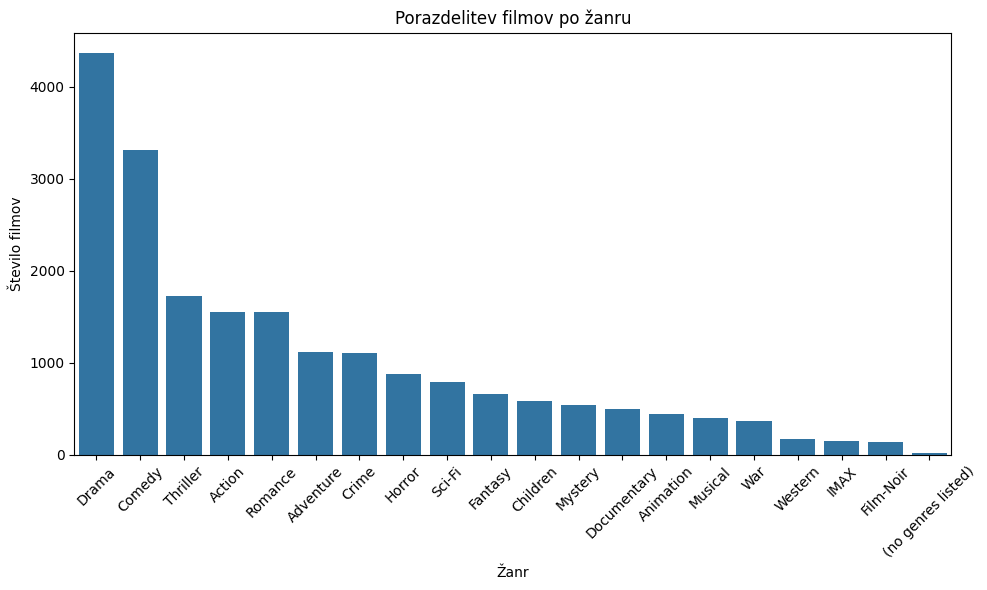

In [12]:
movies_genre = movies.copy()
movies_genre['genre_list'] = movies_genre['genres'].str.split('|')

movies_exploded = movies_genre.explode('genre_list')

all_genres = movies_exploded['genre_list'].unique()
print("Skupno število različnih žanrov:", len(all_genres))

genre_counts = movies_exploded['genre_list'].value_counts()
display(genre_counts)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xlabel("Žanr")
plt.ylabel("Število filmov")
plt.title("Porazdelitev filmov po žanru")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Odgovor: **vseh različnih žanrov je 19, če ne štejemo tiste, ki nimajo podanega žanra**

#### 3. vprašanje (20%):
Število ocen (ogledov) se za posamezni film razlikuje. Ali
obstaja povezava med gledanostjo in povprečno oceno filma? Opišite postopek, ki
ste ga uporabili pri odgovarjanju na vprašanje.

Kodo lahko razdelite v več celic.

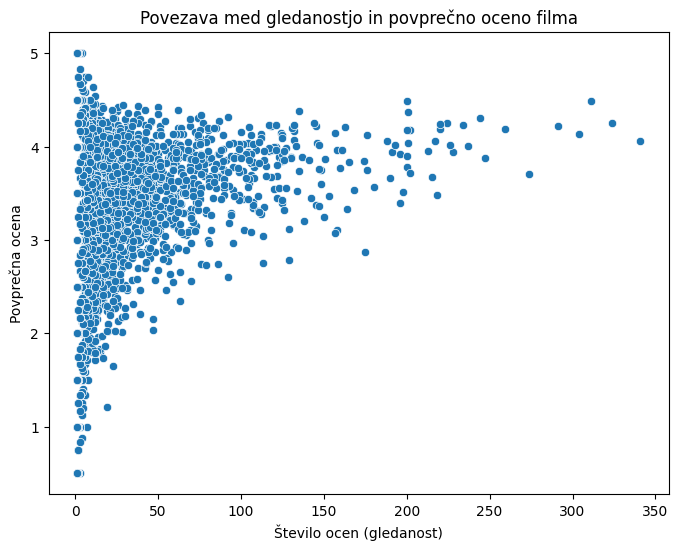

Korelacijski koeficient med št. ocen in povprečno oceno: 0.13082726621823168


In [14]:
movie_stats = ratings.groupby('movieId').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['avg_rating', 'rating_count']
movie_stats = movie_stats.reset_index()

movies_with_stats = pd.merge(movies, movie_stats, on='movieId', how='left')

plt.figure(figsize=(8,6))
sns.scatterplot(data=movies_with_stats, x='rating_count', y='avg_rating')
plt.xlabel("Število ocen")
plt.ylabel("Povprečna ocena")
plt.title("Povezava med gledanostjo in povprečno oceno filma")
plt.show()

korelacijski_k = movies_with_stats[['rating_count','avg_rating']].corr().iloc[0,1]
print("Korelacijski koeficient med št. ocen in povprečno oceno:", korelacijski_k)

Odgovor: **Najprej za vsak film izračunamo število ocen (gledanost) in povprečno oceno. Te vrednosti potem združimo v eno tabelo. Uporabimo graf za prikaz odnosa med števili ocen in povprečno oceno. Izračunamo tudi pearsonov koeficient, da preverimo, ali obstaja linearen odnos med tema dvema spremenljivkama. Pogosto se zgodi, da zelo priljubljeni filmi dobijo več ocen, ampak povprečna ocena ne narašča nujno skupaj z večanjem števila ocen.**

#### 4. vprašanje (30%):
Vsaka ocena je bila vnešena na določen datum (stolpec
*timestamp*).  Ali se popularnost posameznih filmov s časom spreminja?
Problem reši tako, da za dani film ocene razporediš po času ter v vsaku časovni
točki izračunaš povprečje za zadnjih 30, 50, ali 100 ocen. Nariši graf, kako se
ocena spreminja in ga prikaži za dva zanimiva primera filmov.

Kodo lahko razdelite v več celic.

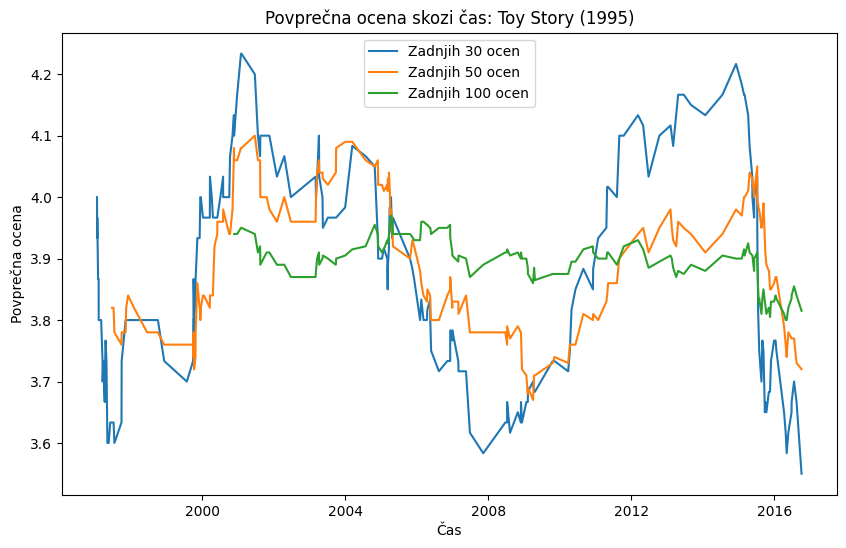

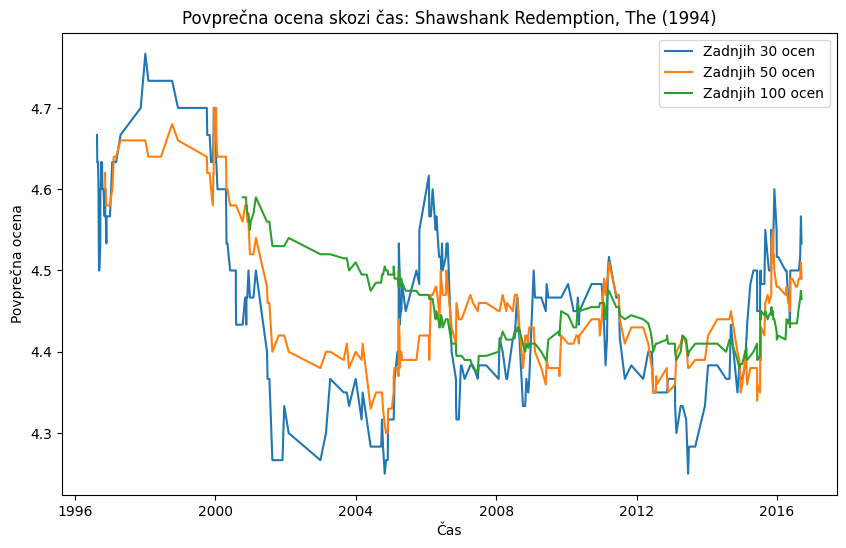

In [20]:
def rolling_movie_ratings(ratings_df, film_id, window_sizes=[30, 50, 100]):
    df_film = ratings_df[ratings_df['movieId'] == film_id].copy()

    df_film['datetime'] = pd.to_datetime(df_film['timestamp'], unit='s')

    df_film = df_film.sort_values('datetime')

    for w in window_sizes:
        df_film[f'rolling_{w}'] = df_film['rating'].rolling(w).mean()

    return df_film

film_ids = [1, 318]

for a in film_ids:
    df_plot = rolling_movie_ratings(ratings, a, window_sizes=[30, 50, 100])

    naslov = movies.loc[movies['movieId'] == a, 'title'].values[0]

    plt.figure(figsize=(10,6))
    plt.plot(df_plot['datetime'], df_plot['rolling_30'], label='Zadnjih 30 ocen')
    plt.plot(df_plot['datetime'], df_plot['rolling_50'], label='Zadnjih 50 ocen')
    plt.plot(df_plot['datetime'], df_plot['rolling_100'], label='Zadnjih 100 ocen')

    plt.xlabel("Čas")
    plt.ylabel("Povprečna ocena")
    plt.title(f"Povprečna ocena skozi čas: {naslov}")
    plt.legend()
    plt.show()

Odgovor: **Da, seveda se popularnost filmov skozi čas spreminja, kot vidimo povprečna ocena filma za zadnjih 30 ocen zelo niha skozi leta.**

#### 5. vprašanje (20%):
Kako bi ocenili popularnost posameznih igralcev? Opišite postopek
ocenitve ter izpišite 10 najbolj popularnih igralcev.

Kodo lahko razdelite v več celic.

In [11]:
stevilo_ocen_po_filmih = ratings.groupby('movieId').size().reset_index(name='stevilo_ocen')

igralci = pd.merge(cast, stevilo_ocen_po_filmih, on='movieId', how='left')

igralci['seznam_igralcev'] = igralci['cast'].str.split('|')
igralci_eksplodirano = igralci.explode('seznam_igralcev')

igralci_eksplodirano.dropna(subset=['seznam_igralcev'], inplace=True)
igralci_eksplodirano = igralci_eksplodirano[igralci_eksplodirano['seznam_igralcev'].str.strip() != '']

igralec_popularnost = igralci_eksplodirano.groupby('seznam_igralcev')['stevilo_ocen'].sum()

igralec_popularnost = igralec_popularnost.sort_values(ascending=False)

top_10_igralci_df = igralec_popularnost.head(10).reset_index()
top_10_igralci_df.columns = ['igralec', 'skupno_stevilo_ocen']

print("10 najbolj 'popularnih' igralcev (po skupnem številu ocen njihovih filmov):")
display(top_10_igralci_df)

10 najbolj 'popularnih' igralcev (po skupnem številu ocen njihovih filmov):


,igralec,skupno_stevilo_ocen
0,Harrison Ford,2297.0
1,Tom Hanks,2262.0
2,Bruce Willis,1832.0
3,Robert De Niro,1628.0
4,Morgan Freeman,1603.0
5,Brad Pitt,1488.0
6,Tom Cruise,1470.0
7,Bill Murray,1380.0
8,Jim Carrey,1354.0
9,Kevin Spacey,1329.0


Odgovor: **Iz ratings za vsak film izračunamo, koliko ocen (gledanost) ima. Združimo to informacijo z cast (kjer so igralci), da dobimo za vsak film, kdo v njem igra in koliko ocen ima ta film. Stolpec cast razbijemo da ima vsak igralec svojo vrstico. Za vsakega igralca seštejemo število ocen vseh filmov, v katerih nastopa (skupna gledanost).Na koncu razvrstimo igralce po tej vrednosti in izpišemo top 10 igralcev.**

#### Bonus vprašanje (5%):

Kateri je tvoj najljubši film? Zakaj?

Odgovor: **Moj najljubši film je Dune (sploh pa Dune 2, ki je še boljši kot prvi) in to z več razlogov:
-Hans Zimmer (največji bog filmske glasbe)
-ko si prvič ogledaš film, ti ni nič jasno, če nisi zelo zelo pozoren na začetku, potem pa greš brati predzgodbe, vse te družine, kaj so, kako so in  potem padeš v celoten dune rabbit hole, saj je vse skupaj zelo zanimivo
-film, ki ima top notch VFX in CGI (verjetno eden izmed najbolših)**

### Zapiski
Za nalaganje podatkov lahko uporabite modul `csv`.

In [1]:
from csv import DictReader

reader = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]

Podatki v zadnji vrstici datoteke:

In [2]:
user, movie, rating, timestamp

('671', '6565', '3.5', '1074784724')

Pretvorba časovnega formata (*Unix time*). Kode za oblikovanje so navedene v dokumentaciji modula [`datetime`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [3]:
#from datetime import datetime

t = 1217897793 # Unix-time
ts = datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M')
ts

'2008-08-05 02:56'